<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covid_ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anális dos dados da COVID-19 no estado do Maranhão**

Dados de todo o estado e de algumas de sua principais cidades.


**1.   Testes realizados;**

**2.   Profissionais da saúde.**

Disponíveis em: https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ma.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid_ma = pd.read_csv('https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ma.csv', encoding='latin1', sep=';')

In [3]:
covid_ma.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,AbEVo5S4nX,2020-03-30T03:00:00.000Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Sim,2235 - Enfermeiro,NaN,Coletado,2020-03-30T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,55.0,NaN,NaN,NaN
1,ozHhVSzSdq,2020-04-06T13:17:27.512Z,2020-03-22T03:00:00.000Z,undefined,"Febre, Tosse, Dispneia, Outros",Não,NaN,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,47.0,NaN,NaN,NaN
2,6KJS2Qdpq2,2020-04-01T03:00:00.000Z,2020-03-26T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse",Sim,2235 - Enfermeiro,NaN,Coletado,2020-04-02T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,37.0,NaN,NaN,NaN
3,SXtw57busW,2020-04-01T03:00:00.000Z,2020-03-31T03:00:00.000Z,undefined,"Dispneia, Tosse",Não,NaN,NaN,Coletado,2020-04-01T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São José de Ribamar,2111201.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,33.0,NaN,NaN,NaN
4,NgKU8QKx0X,2020-04-06T07:23:33.348Z,2020-04-04T04:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,56.0,NaN,NaN,NaN


In [4]:
testes_ma = covid_ma.value_counts('resultadoTeste').sum()

In [5]:
testes_ma

578824

In [6]:
covid_ma.value_counts('resultadoTeste')

resultadoTeste
Negativo                         317675
Positivo                         260862
Inconclusivo ou Indeterminado       287
dtype: int64

In [7]:
result_ma = covid_ma.value_counts('resultadoTeste')

In [8]:
result_ma = result_ma.drop('Inconclusivo ou Indeterminado')

In [9]:
result_ma

resultadoTeste
Negativo    317675
Positivo    260862
dtype: int64




**Profissionais da saúde infectados no Maranhão**

In [10]:
pi_ma = covid_ma.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [11]:
tpi_ma = pi_ma.value_counts('resultadoTeste')

In [12]:
tpi_ma

resultadoTeste
Positivo    10719
dtype: int64

**Sexo dos infectados no Maranhão**

In [47]:
positivo_df = covid_ma.query('resultadoTeste == "Positivo"')

In [65]:
positivos_sexo_ma = positivo_df.value_counts('sexo')

In [66]:
positivos_sexo_ma

sexo
Feminino      145046
Masculino     115645
Indefinido       171
dtype: int64

### **São Luís -  Capital**

In [13]:
covid_slz = covid_ma.query('municipio == "São Luís"')

In [14]:
covid_slz.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,AbEVo5S4nX,2020-03-30T03:00:00.000Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Sim,2235 - Enfermeiro,NaN,Coletado,2020-03-30T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,55.0,NaN,NaN,NaN
2,6KJS2Qdpq2,2020-04-01T03:00:00.000Z,2020-03-26T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse",Sim,2235 - Enfermeiro,NaN,Coletado,2020-04-02T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,37.0,NaN,NaN,NaN
4,NgKU8QKx0X,2020-04-06T07:23:33.348Z,2020-04-04T04:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,56.0,NaN,NaN,NaN
5,Y5rlV9HJRa,2020-04-06T13:31:04.344Z,2020-03-03T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse, Outros",Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,33.0,NaN,NaN,NaN
6,SepJKM9O3F,2020-04-06T13:17:10.116Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Não,NaN,NaN,Coletado,2020-04-01T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,63.0,NaN,NaN,NaN


In [15]:
testes_slz = covid_slz.value_counts('resultadoTeste').sum()

In [16]:
testes_slz

89179

In [17]:
covid_slz.value_counts('resultadoTeste')

resultadoTeste
Negativo                         60068
Positivo                         29090
Inconclusivo ou Indeterminado       21
dtype: int64

In [18]:
result_slz = covid_slz.value_counts('resultadoTeste')

In [19]:
result_slz = result_slz.drop('Inconclusivo ou Indeterminado')

In [20]:
result_slz

resultadoTeste
Negativo    60068
Positivo    29090
dtype: int64

**Profissionais da saúde infectados em São Luís**







In [21]:
pi_slz = covid_slz.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [22]:
tpi_slz = pi_slz.value_counts('resultadoTeste')

In [23]:
tpi_slz

resultadoTeste
Positivo    2829
dtype: int64

**Sexo dos infectados em São Luís**

In [50]:
positivo_slz = covid_slz.query('resultadoTeste == "Positivo"')

In [67]:
positivos_sexo_slz = positivo_slz.value_counts('sexo')

In [68]:
positivos_sexo_slz

sexo
Masculino     14935
Feminino      14058
Indefinido       97
dtype: int64

# **Açailândia**

In [24]:
covid_acai = covid_ma.query('municipio == "Açailândia"')

In [25]:
covid_acai.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
72,HSeQP58XwJ,2020-04-05T03:00:00.000Z,2020-03-13T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Tosse",Não,NaN,Doenças cardíacas crônicas,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,45.0,NaN,NaN,NaN
373,0ggNmmd4d8,2020-04-04T03:00:00.000Z,2020-03-30T03:00:00.000Z,undefined,"Tosse, Febre, Dispneia",Não,NaN,Doenças respiratórias crônicas descompensadas,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,40.0,NaN,NaN,NaN
719,XMTKArMD4Z,2020-04-03T20:15:20.670Z,2020-03-28T03:00:00.000Z,undefined,"Febre,Tosse,Dispneia",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,39.0,NaN,NaN,NaN
794,FrXtr4D2Me,2020-04-04T16:01:30.910Z,2020-04-04T03:00:00.000Z,undefined,"Dor de Garganta,Dispneia,Febre",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,29.0,NaN,NaN,NaN
824,DYMCe6QVBa,2020-04-05T15:47:12.970Z,2020-03-24T03:00:00.000Z,undefined,"Tosse, Febre, Dispneia, Dor de Garganta",Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Solicitado,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,45.0,NaN,NaN,NaN


In [27]:
testes_acai = covid_acai.value_counts('resultadoTeste').sum()

In [28]:
testes_acai

11986

In [29]:
result_acai = covid_acai.value_counts('resultadoTeste')

In [30]:
result_acai

resultadoTeste
Negativo    7205
Positivo    4781
dtype: int64

**Profissionais da saúde infectados em Açailândia**

In [31]:
pi_acai = covid_acai.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [32]:
tpi_acai = pi_acai.value_counts('resultadoTeste')

In [33]:
tpi_acai

resultadoTeste
Positivo    41
dtype: int64

**Sexo dos infectados em Açailândia**

In [52]:
positivo_acai = covid_acai.query('resultadoTeste == "Positivo"')

In [69]:
positivos_sexo_acai = positivo_acai.value_counts('sexo')

In [70]:
positivos_sexo_acai

sexo
Masculino     2434
Feminino      2342
Indefinido       5
dtype: int64

# **Imperatriz**

In [34]:
covid_itz = covid_ma.query('municipio == "Imperatriz"')

In [35]:
covid_itz.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
1,ozHhVSzSdq,2020-04-06T13:17:27.512Z,2020-03-22T03:00:00.000Z,undefined,"Febre, Tosse, Dispneia, Outros",Não,NaN,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,47.0,NaN,NaN,NaN
52,C0ya737eMv,2020-04-06T03:00:00.000Z,2020-03-30T03:00:00.000Z,undefined,"Dor de Garganta, Febre, Tosse",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,26.0,NaN,NaN,NaN
57,JUzKNcyiIH,2020-04-06T03:00:00.000Z,2020-04-05T03:00:00.000Z,undefined,Tosse,Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,30.0,NaN,NaN,NaN
63,ECYrdK7ZN6,2020-04-06T03:00:00.000Z,2020-04-04T03:00:00.000Z,undefined,"Dispneia, Febre",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,41.0,NaN,NaN,NaN
164,SsE6bE0dw8,2020-04-06T18:04:25.570Z,2020-04-06T03:00:00.000Z,undefined,"Outros, Dispneia",Sim,225 - Médico,Doenças cardíacas crônicas,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,70.0,NaN,NaN,NaN


In [36]:
testes_itz = covid_itz.value_counts('resultadoTeste').sum()

In [38]:
testes_itz

47281

In [39]:
result_itz = covid_itz.value_counts('resultadoTeste')   

In [40]:
result_itz = result_itz.drop('Inconclusivo ou Indeterminado')

In [41]:
result_itz

resultadoTeste
Negativo    29997
Positivo    17267
dtype: int64

**Profissionais da saúde infectados em Imperatriz**

In [42]:
pi_itz = covid_itz.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [43]:
tpi_itz = pi_itz.value_counts('resultadoTeste')

In [44]:
tpi_itz

resultadoTeste
Positivo    711
dtype: int64

**Sexo dos infectados em Imperatriz**

In [54]:
positivo_itz = covid_itz.query('resultadoTeste == "Positivo"')

In [71]:
positivos_sexo_itz = positivo_itz.value_counts('sexo')

In [72]:
positivos_sexo_itz

sexo
Feminino      9373
Masculino     7887
Indefinido       7
dtype: int64

# **Visualização dos dados**

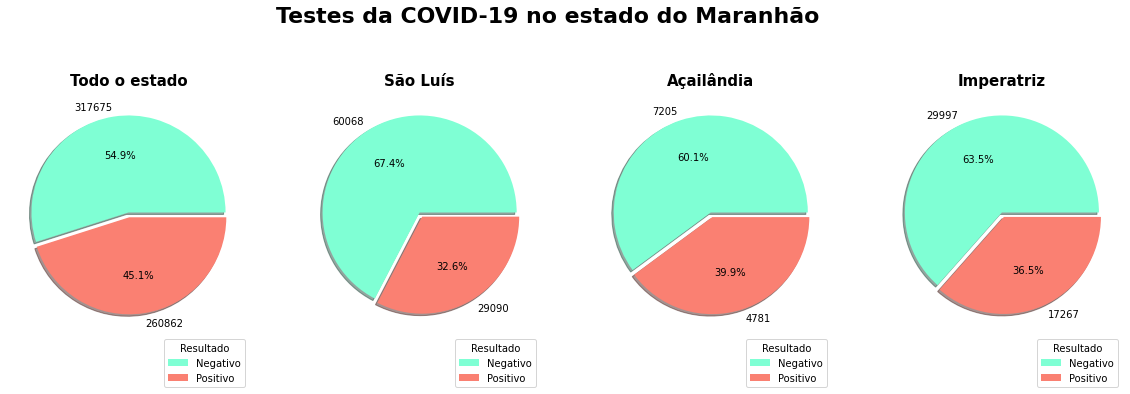

In [45]:
#---------Testes da COVID-19 no estado do Maranhão---------
cores = ['#7FFFD4', '#FA8072']
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,6))
plt.suptitle('Testes da COVID-19 no estado do Maranhão', weight='bold', size=22)
legenda1 = ['Negativo', 'Positivo']

ax1.pie(result_ma, labels=result_ma, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax1.set_title('Todo o estado', weight='bold', size=15)
ax1.legend(legenda1, title='Resultado', bbox_to_anchor=(1, 0))

ax2.pie(result_slz, labels=result_slz, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax2.set_title('São Luís', weight='bold', size=15)
ax2.legend(legenda1, title='Resultado', bbox_to_anchor=(1, 0))

ax3.pie(result_acai, labels=result_acai, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax3.set_title('Açailândia', weight='bold', size=15)
ax3.legend(legenda1, title='Resultado', bbox_to_anchor=(1, 0))

ax4.pie(result_itz, labels=result_itz, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax4.set_title('Imperatriz', weight='bold', size=15)
ax4.legend(legenda1, title='Resultado', bbox_to_anchor=(1, 0))

plt.show()

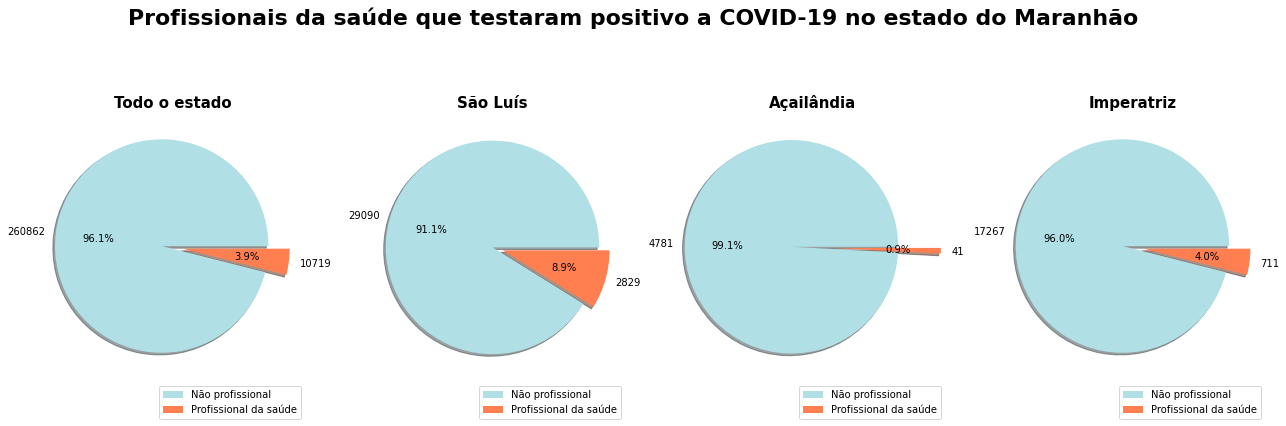

In [107]:
#---------Profissionais da saúde que testaram positivo a COVID-19---------
cores = ['#B0E0E6', '#FF7F50']
ma = (result_ma['Positivo'], tpi_ma['Positivo'])
slz = (result_slz['Positivo'], tpi_slz['Positivo'])
acai = (result_acai['Positivo'], tpi_acai['Positivo'])
itz = (result_itz['Positivo'], tpi_itz['Positivo'])
legenda = ('Não profissional', 'Profissional da saúde')

fig,(ax1, ax2, ax3, ax4)= plt.subplots(1,4, figsize = (22,7))
plt.suptitle('Profissionais da saúde que testaram positivo a COVID-19 no estado do Maranhão', weight='bold', size=22)
ax1.pie(ma, labels=ma, autopct='%1.1f%%', shadow=True, explode=(0.1,0.1), colors=cores)
ax1.set_title('Todo o estado', weight='bold', size=15)
ax1.legend(legenda, bbox_to_anchor=(1, 0))

ax2.pie(slz, labels=slz, autopct='%1.1f%%', shadow=True, explode=(0,0.1), colors=cores)
ax2.set_title('São Luís', weight='bold', size=15)
ax2.legend(legenda, bbox_to_anchor=(1, 0))

ax3.pie(acai, labels=acai, autopct='%1.1f%%', shadow=True, explode=(0.2,0.2), colors=cores)
ax3.set_title('Açailândia', weight='bold', size=15)
ax3.legend(legenda, bbox_to_anchor=(1, 0))

ax4.pie(itz, labels=itz, autopct='%1.1f%%', shadow=True, explode=(0.1,0.1), colors=cores)
ax4.set_title('Imperatriz', weight='bold', size=15)
ax4.legend(legenda, bbox_to_anchor=(1, 0))

plt.show()

Text(0.5, 1.0, 'Imperatriz')

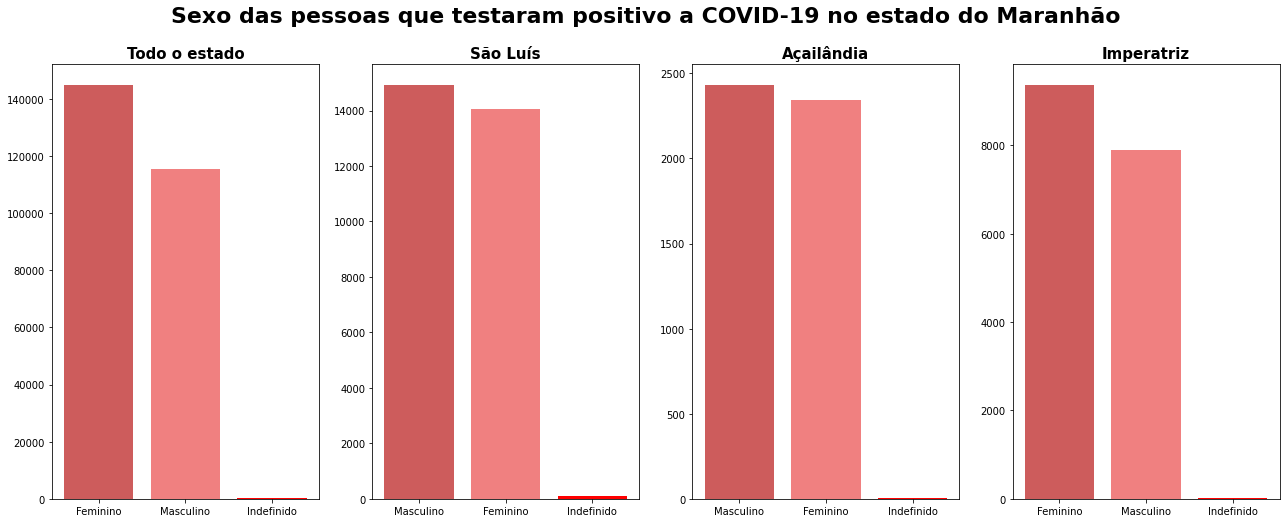

In [124]:
#---------Sexo das pessoa que testaram positivo a COVID-19---------
cores = ['#CD5C5C', '#F08080', '#FF0000']

fig,(ax1, ax2, ax3, ax4)= plt.subplots(1,4, figsize = (22,8))

plt.suptitle('Sexo das pessoas que testaram positivo a COVID-19 no estado do Maranhão', weight='bold', size=22)
ax1.bar(positivos_sexo_ma.index, positivos_sexo_ma.values, color=cores)
ax1.set_title('Todo o estado', weight='bold', size=15)

ax2.bar(positivos_sexo_slz.index, positivos_sexo_slz.values, color=cores)
ax2.set_title('São Luís', weight='bold', size=15)

ax3.bar(positivos_sexo_acai.index, positivos_sexo_acai.values, color=cores)
ax3.set_title('Açailândia', weight='bold', size=15)

ax4.bar(positivos_sexo_itz.index, positivos_sexo_itz.values, color=cores)
ax4.set_title('Imperatriz', weight='bold', size=15)
